<a href="https://colab.research.google.com/github/robertomartinezedu/Curso-IA-BigData/blob/main/PIA/EntregaUd3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 AED

In [161]:
import kagglehub
import pandas as pd
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


In [162]:
ls /root/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5

netflix_titles.csv


In [163]:
import os
csv_file_path = os.path.join(path,"netflix_titles.csv")
netflix_df = pd.read_csv(csv_file_path)

In [164]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [165]:
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


## 1.1 DEFINICIÓN DE COLUMNAS


1. **Show_id**: Un ID único para una película o serie. Cada película o serie en el conjunto de datos tiene asignado un número único.  
2. **Type**: El tipo de película o serie. Por ejemplo, contiene valores como "Movie" o "TV Show".  
3. **Title**: El título de la película o serie. Indica el nombre que se muestra al usuario.  
4. **Director**: El director de la película o serie. Contiene los nombres de la persona o personas que dirigieron la producción.  
5. **Cast**: Una lista de actores en la película o serie. Se enumeran los nombres de los actores que interpretan a los personajes principales.  
6. **Country**: El país o los países donde se realizó la película o serie. Indica el país en el que se rodó la producción.  
7. **Date_added**: La fecha en que se añadió a Netflix. Indica la fecha en la que la película o serie se incorporó a la plataforma.  
8. **Release_year**: El año en que se estrenó la película o serie. Indica el año en que la producción llegó por primera vez a su audiencia.  
9. **Rating**: La clasificación de la película o serie según la audiencia. A menudo se evalúa junto con la clasificación por edades (por ejemplo, PG-13, R).  
10. **Duration**: La duración de la película o serie. Indica el tiempo total de ejecución en minutos para una película o el tiempo total de temporadas para una serie.  
11. **Listed_in**: Las categorías en las que se clasifica la película o serie. Por ejemplo, incluye géneros como "Action", "Drama", "Comedy".  
12. **Description**: Una breve descripción de la película o serie. Proporciona a los espectadores información sobre la trama de la producción.  

Se va a realizar una observación preliminar de la distribución de los datos nulos.

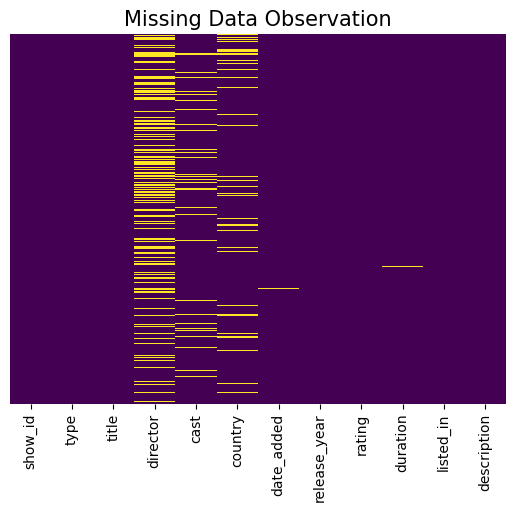

In [166]:
import matplotlib.pyplot as plt
sns.heatmap(netflix_df.isnull(),yticklabels=False,cbar=False,cmap='viridis');
plt.title("Missing Data Observation", fontsize = 15)
plt.show()

Como se puede observar faltan una gran cantidad de directores, actores y países.

In [167]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [168]:
netflix_df.duplicated().sum()

0

In [169]:
typeNum = netflix_df['type'].nunique()
directorNum = netflix_df['country'].nunique()
ratingNum = netflix_df['rating'].nunique()
release_yearNum = netflix_df['release_year'].nunique()
listed_inNum = netflix_df['listed_in'].nunique()
print(f"type: {typeNum}")
print(f"director: {directorNum}")
print(f"rating: {ratingNum}")
print(f"release_year: {release_yearNum}")
print(f"listed_in: {listed_inNum}")

type: 2
director: 748
rating: 17
release_year: 74
listed_in: 514


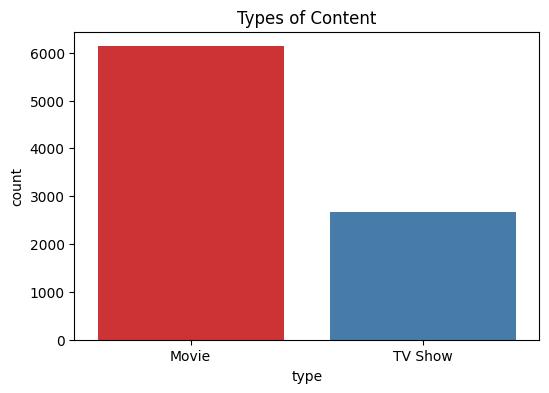

In [170]:
type_value = netflix_df['type'].value_counts()
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=netflix_df, x='type', hue='type', palette='Set1', ax=ax)
ax.set_title('Types of Content')
plt.show()

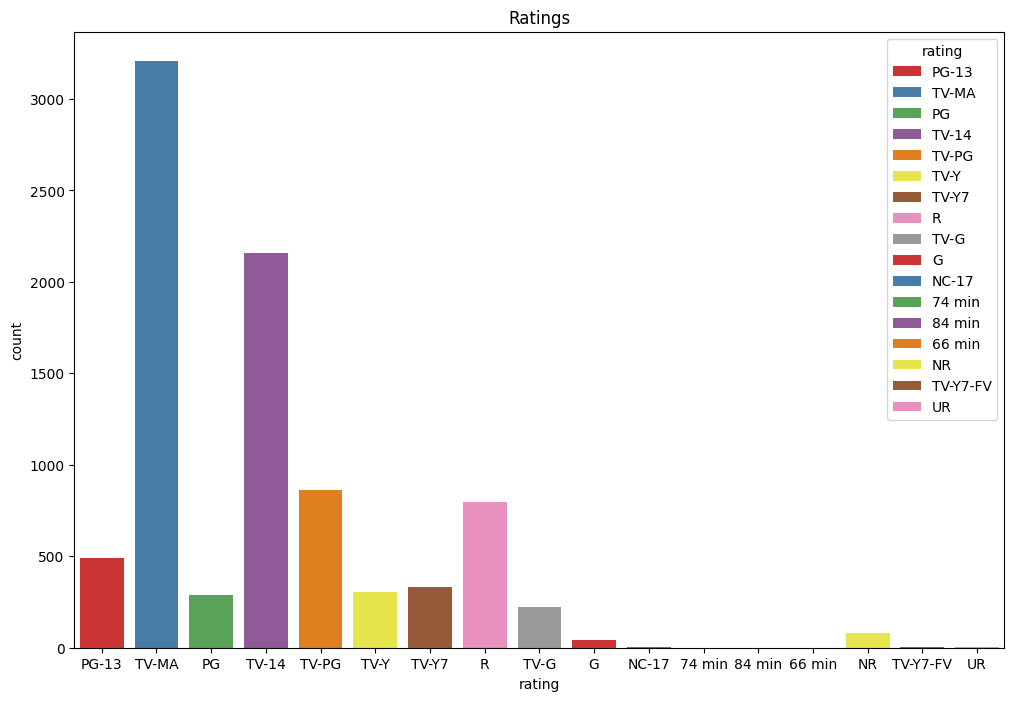

In [171]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=netflix_df, x='rating', hue='rating', palette='Set1', ax=ax)
ax.set_title('Ratings')
plt.show()

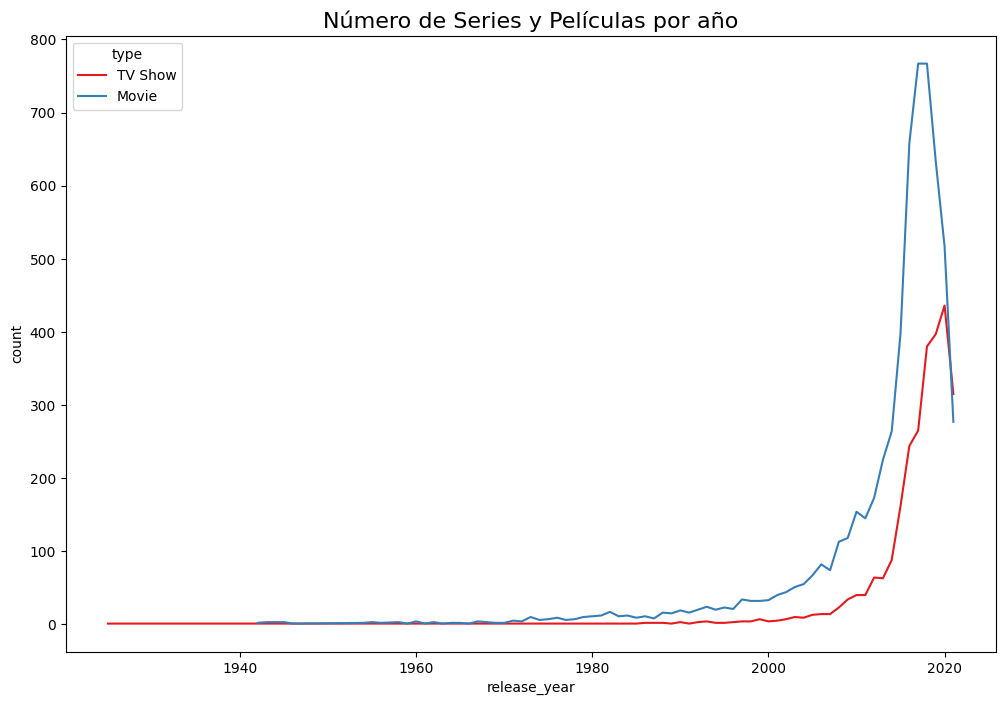

In [172]:
release_counts = netflix_df.groupby(["release_year", "type"]).size().reset_index(name="count")
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=release_counts, x="release_year", y="count", hue="type", palette='Set1', ax=ax)
plt.title("Número de Series y Películas por año", fontsize = 16)
plt.show()

<ipython-input-173-ac32f12ae156>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top10_country.index, y = top10_country.values, palette='Set2')


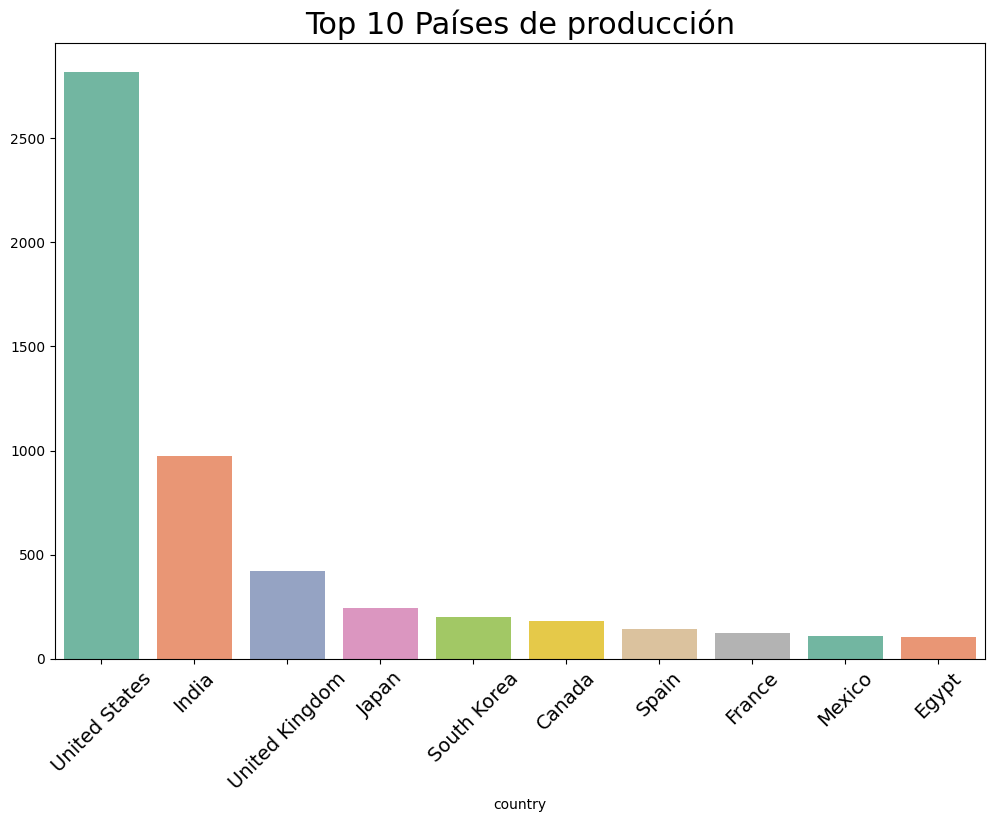

In [173]:
top10_country = netflix_df['country'].value_counts().nlargest(10)
plt.figure(figsize = (12,8))
sns.barplot(x = top10_country.index, y = top10_country.values, palette='Set2')
plt.title("Top 10 Países de producción", fontsize = 22)
plt.xticks(rotation = 45, fontsize = 14)
plt.show()

Como se puede observar en estas gráficas, los datos están distribuidos de forma bastante irregular.
Si nos fijamos en la columna ```type```, la mayoría de producciones son películas.
También se puede observar cómo hay una gran mayoría de ```rating``` que corresponden a dos categorías, así como que la mayoría de producciones son recientes y que el groso de dichas producciones se han lanzado en Estados Unidos.

<ipython-input-174-9f85626cdddf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


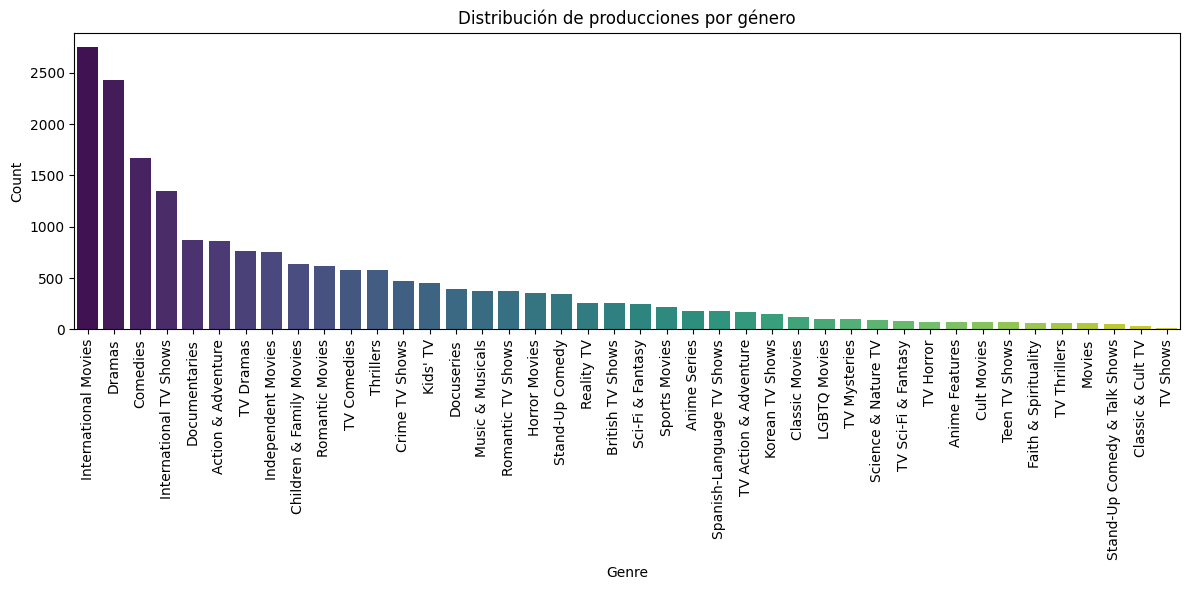

Número de géneros: 42


In [174]:
genre_counts = netflix_df['listed_in'].str.split(', ').explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribución de producciones por género")
plt.tight_layout()
plt.show()

print(f"Número de géneros: {len(genre_counts)}")

En el caso de la columna ```listed_in``` podemos observar también una distribución irregular, con grandes diferencias respecto a la cantidad de producciones por cada género.
Para conseguir este gráfico, se ha tenido en cuenta que el campo ```listed_in``` puede contener diversos géneros en cada fila.

#2 PREPROCESAMIENTO

Se van a revisar los valores y características de los datos de las diferentes columnas para valorar cómo mejorar el conjunto de datos de cara a la creación y entrenamiento de un modelo.

En primera instancia podemos observar que la columna ```type``` contiene sólamente dos valores diferentes: "Movie" o "TV Show", con lo que se ha considerado transformar estos datos a true o false.

In [175]:
netflix_df['type_is_movie'] = netflix_df['type'] == 'Movie'
netflix_df = netflix_df.drop('type', axis=1)
netflix_df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_is_movie
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",True
1,s2,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",False
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,False
3,s4,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",False
4,s5,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,False


##2.1 TRATAMIENTO DE NULOS

In [176]:
nulos_por_columna = netflix_df.isnull().sum()
print(nulos_por_columna)

show_id             0
title               0
director         2634
cast              825
country           831
date_added         10
release_year        0
rating              4
duration            3
listed_in           0
description         0
type_is_movie       0
dtype: int64


Respecto a aquellas producciones que presentan datos nulos se va a proceder a asignarles el valor "Unknown", dado que representan una gran cantidad con respecto al total de datos.
Lo ideal sería explotar la API de IMDB u otras webs que contengan información fiable sobre películas o series para rellenar los datos que faltan, pero no es el objetivo de esta práctica.
También se va a realizar la misma acción con las columnas cast y country, dado que presentan una gran cantidad de nulos y se perderían demasiados datos.

In [177]:
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')
netflix_df['country'] = netflix_df['country'].fillna('Unknown')
netflix_df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_is_movie
0,s1,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",True
1,s2,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",False
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,False
3,s4,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",False
4,s5,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,False


El resto de nulos están presentes en las columnas ```date_added```, ```rating``` y ```duration```.
En el caso de ```date_added```, contiene información sobre las fechas en las que se han añadido las diferentes producciones a la plataforma, y por otra parte tenemos el año de lanzamiento en la columna ```release_year```.
Esta segunda columna nos ofrece más información, pues intrínsecamente está más ligada a las tendencias y lenguaje cinematográfico del momento en el que se grabó, con lo que se decide descartar la columna ```date_added```.

En el caso de la columna ```duration``` contamos con dos formatos diferentes de representación. Por una parte en las series se indica el número de temporadas, y en los largometrajes se indica la duración en minutos, con lo que no ofrece información relevante y se procede a eliminar.

La columna ```rating``` en cambio, sí que puede ofrecer información interesante y sólamente se van a eliminar sus filas con valores nulos.

In [178]:
netflix_df = netflix_df.drop(['date_added', 'duration'], axis=1)
netflix_df = netflix_df.dropna(subset=['rating'])

Respecto a los géneros de las producciones, al tratarse de listas de géneros se va a proceder a transformarlos en una lista, pues los diferentes valores están separados siempre por una coma.


In [179]:
netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x: x.split(', '))
netflix_df.head()

,show_id,title,director,cast,country,release_year,rating,listed_in,description,type_is_movie
0,s1,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,[Documentaries],"As her father nears the end of his life, filmm...",True
1,s2,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",False
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,False
3,s4,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",False
4,s5,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,False


Una vez transformados los datos de los géneros, se va a valorar eliminar o sustituir por un género genérico "Others" aquellos géneros con una representación muy baja, por ejemplo mejor de 10.

In [180]:
genre_counts = netflix_df.explode('listed_in')['listed_in'].value_counts()

In [181]:
genre_counts.tail(10)

,count
listed_in,
TV Horror,75
Anime Features,71
Cult Movies,71
Teen TV Shows,69
Faith & Spirituality,65
TV Thrillers,57
Movies,56
Stand-Up Comedy & Talk Shows,56
Classic & Cult TV,28


Al no haber una gran cantidad de géneros especialmente aislados se van a conservar los datos, por si pudieran enriquecer el modelo.

Otro punto interesante y que nos adentraría en otro ámbito, sería el procesamiento del lenguaje que podría hacerse con la columna ```description```.
Podríamos "tokenizar" los valores como en el caso de los géneros, limpiar los valores innecesarios como conjunciones, pronombres etc. Posteriormente extraer términos clave usando la librería homónima del algorito RAKE e incluso realizar embeddings para distinguir relaciones semánticas entre términos, además de hacer análisis de sentimientos o incluso agrupación temática.
Al tratarse de un ámbito más avanzado se procede a eliminar la columna.

In [182]:
netflix_df = netflix_df.drop('description', axis=1)
netflix_df.head()

,show_id,title,director,cast,country,release_year,rating,listed_in,type_is_movie
0,s1,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,[Documentaries],True
1,s2,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,"[International TV Shows, TV Dramas, TV Mysteries]",False
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac...",False
3,s4,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,TV-MA,"[Docuseries, Reality TV]",False
4,s5,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,"[International TV Shows, Romantic TV Shows, TV...",False


##2.2 COLUMNAS CATEGÓRICAS

Para mejorar la efectividad de nuestro modelo se van a tratar las columnas categóricas de diferentes formas.

Para empezar, vamos a transformar los datos de rating según su significado, que se puede encontrar en los siguientes artículos:

*   [TV Parental Guidelines](https://en.wikipedia.org/wiki/TV_Parental_Guidelines)

*   [Sistema de calificaciones de la Motion Picture Association](https://es.wikipedia.org/wiki/Sistema_de_calificaciones_de_la_Motion_Picture_Association)

Se van a cambiar las clasificaciones actuales por cinco grandes grupos etarios.

In [183]:
rating_map = {'TV-MA':'Adultos',
              'R':'Adultos',
              'PG-13':'Adolescentes',
              'TV-14':'Adultos jóvenes',
              'TV-PG':'Preadolescentes',
              'NR':'Adultos',
              'TV-G':'Niños',
              'TV-Y':'Niños',
              'TV-Y7':'Preadolescentes',
              'PG':'Preadolescentes',
              'G':'Niños',
              'NC-17':'Adultos',
              'TV-Y7-FV':'Preadolescentes',
              'UR':'Adultos'}
netflix_df['rating'].replace(rating_map, inplace = True)

<ipython-input-183-16eb9798c1a4>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df['rating'].replace(rating_map, inplace = True)


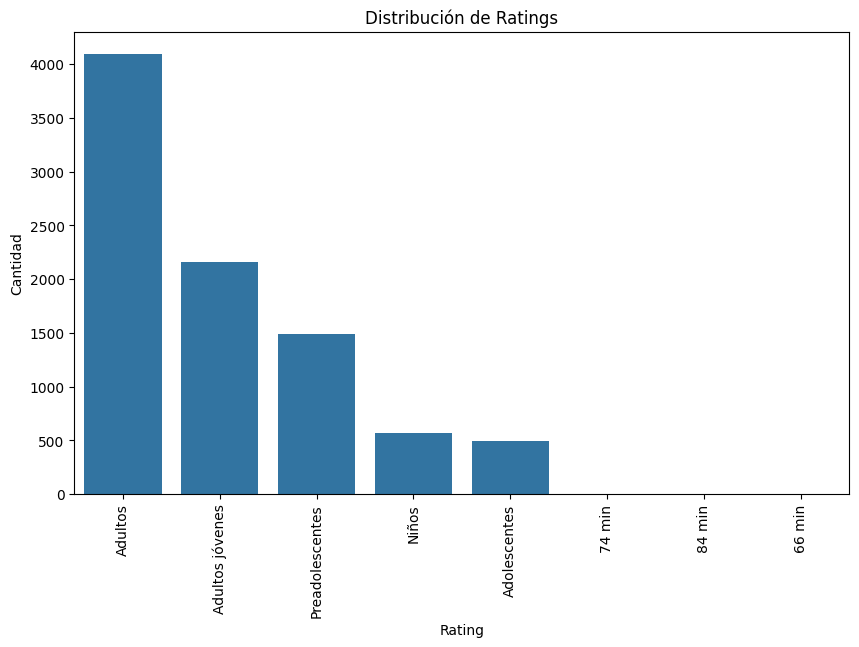

In [184]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.countplot(data=netflix_df, x='rating', order=netflix_df['rating'].value_counts().index)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor lectura
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()

Se proceden a eliminar los valores atípicos que no corresponden a ratings válidos.

In [185]:
valores_a_eliminar = ['74 min', '84 min', '66 min']
netflix_df = netflix_df[~netflix_df['rating'].isin(valores_a_eliminar)]


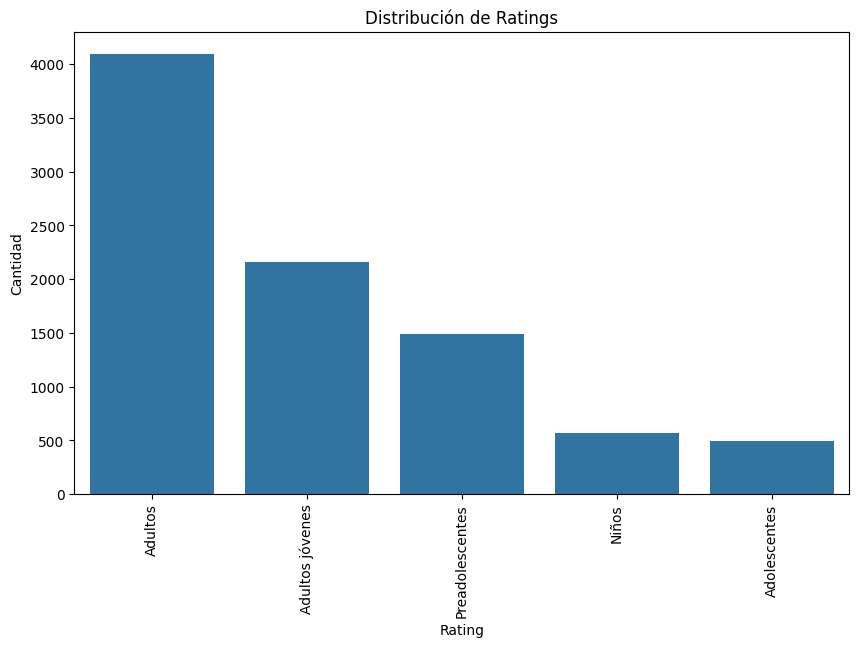

In [186]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.countplot(data=netflix_df, x='rating', order=netflix_df['rating'].value_counts().index)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor lectura
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()

Para mejorar el entrenamiento del modelo se van a sustituir estos valores por números.

In [187]:
rating_map = {'Adultos':1, 'Adultos jóvenes':2, 'Adolescentes':3, 'Preadolescentes': 4, 'Niños':5}
netflix_df['rating'].replace(rating_map, inplace = True)

<ipython-input-187-dc9016bec7dc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_df['rating'].replace(rating_map, inplace = True)
<ipython-input-187-dc9016bec7dc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  netflix_df['rating'].replace(rating_map, inplace = True)


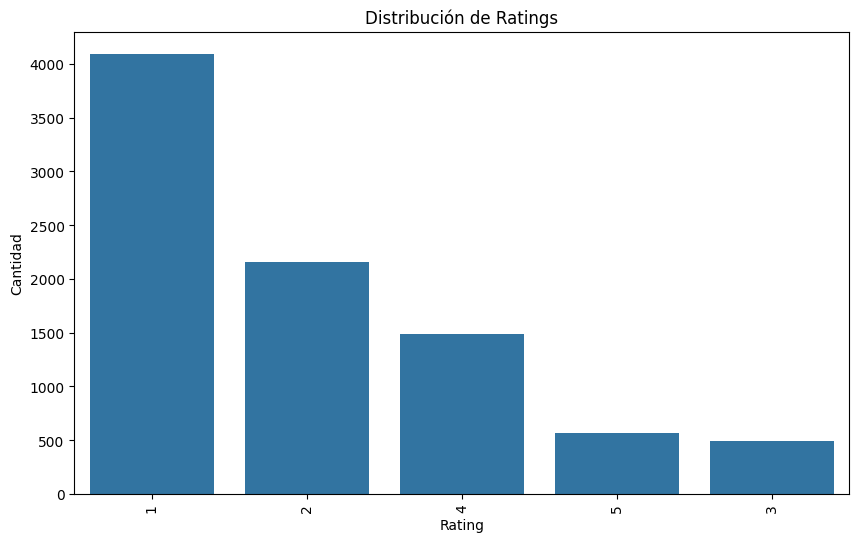

In [188]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.countplot(data=netflix_df, x='rating', order=netflix_df['rating'].value_counts().index)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor lectura
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()

In [189]:
netflix_df.head()

,show_id,title,director,cast,country,release_year,rating,listed_in,type_is_movie
0,s1,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,3,[Documentaries],True
1,s2,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,1,"[International TV Shows, TV Dramas, TV Mysteries]",False
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,1,"[Crime TV Shows, International TV Shows, TV Ac...",False
3,s4,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,1,"[Docuseries, Reality TV]",False
4,s5,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,1,"[International TV Shows, Romantic TV Shows, TV...",False


# 3 ENTRENAMIENTO

## 3.1 KMEANS

Se va a realizar un entrenamiento aplicando KMEANS

Primeras filas del DataFrame escalado:
   release_year    rating   cluster
0      0.659721  0.660395 -1.344862
1      0.773073 -0.845560  0.095769
2      0.773073 -0.845560  0.095769
3      0.773073 -0.845560  0.095769
4      0.773073 -0.845560  0.095769


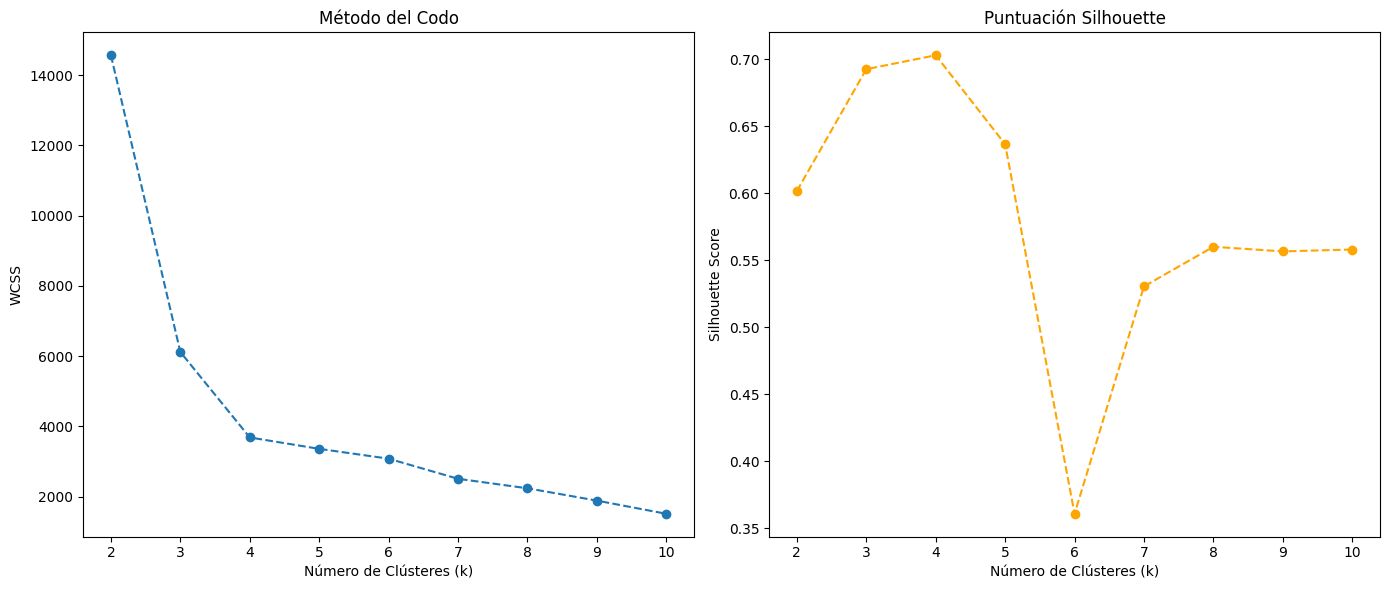

Valor óptimo de k basado en el método del codo: 2
Valor óptimo de k basado en la puntuación Silhouette: 4
Inercia final (WCSS): 3684.9896895761676
Silhouette Score para k=4: 0.7028798045211566
Distribución de películas en cada clúster:
cluster
1    5358
0    2153
2    1010
3     279
Name: count, dtype: int64


In [213]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Suponiendo que tienes el DataFrame `netflix_df` con las películas y características
# Seleccionamos solo las columnas numéricas
df_numeric = netflix_df.select_dtypes(include=[np.number])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Ver las primeras filas del DataFrame escalado
print("Primeras filas del DataFrame escalado:")
print(pd.DataFrame(df_scaled, columns=df_numeric.columns).head())

# Paso 3: Determinar el número óptimo de clústeres
def calcular_optimo_k(data, max_k=10):
    wcss = []  # Suma de cuadrados dentro de los clústeres
    silhouette_scores = []

    # Evaluamos varios valores de k (de 2 a max_k)
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # Inercia: métrica de ajuste del modelo
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    return wcss, silhouette_scores

# Calcular métricas para varios valores de k
max_k = 10
wcss, silhouette_scores = calcular_optimo_k(df_scaled, max_k=max_k)

# Paso 4: Visualización de los resultados
plt.figure(figsize=(14, 6))

# Gráfica del codo (WCSS)
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k + 1), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('WCSS')

# Gráfica de la puntuación Silhouette
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Puntuación Silhouette')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Paso 5: Selección del número óptimo de clústeres
# Encontramos el valor de k basado en el "codo" (método del codo) y la puntuación Silhouette
# El número óptimo es aquel que tiene la mayor puntuación Silhouette y está cerca del "codo" en la gráfica

# Calcular la diferencia entre WCSS de k y k+1 (método del codo)
wcss_diff = np.diff(wcss)
elbow_k = np.argmin(wcss_diff) + 2  # Añadimos 2 ya que el índice empieza en 0, pero k empieza en 2

# Encontrar el valor de k con la puntuación Silhouette más alta
optimal_k_silhouette = np.argmax(silhouette_scores) + 2  # Añadimos 2 porque el rango de k empieza en 2

# Elegir el número óptimo de clústeres basado en el análisis visual y las métricas
print(f"Valor óptimo de k basado en el método del codo: {elbow_k}")
print(f"Valor óptimo de k basado en la puntuación Silhouette: {optimal_k_silhouette}")

# Seleccionar el k más adecuado (el que esté más cerca del valor de la puntuación Silhouette más alta)
optimal_k = optimal_k_silhouette  # Usamos el que tenga la puntuación Silhouette más alta, o el que consideres más apropiado

# Paso 6: Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_scaled)

netflix_df['cluster'] = kmeans.labels_

print(f"Inercia final (WCSS): {kmeans.inertia_}")
print(f"Silhouette Score para k={optimal_k}: {silhouette_score(df_scaled, kmeans.labels_)}")

print("Distribución de películas en cada clúster:")
print(netflix_df['cluster'].value_counts())


Como se puede observar el número de clusters óptimo es de 4.
A parte de aplicar el método del codo se ha tenido en cuenta la silueta, que proporciona una visión más matizada de la distancia de separación entre los grupos resultantes que la inercia.

In [197]:
movie_id = 's5485'
movie_index = netflix_df[netflix_df['show_id'] == movie_id].index[0]
movie_cluster = netflix_df.loc[movie_index, 'cluster']
print(f"La película con ID {movie_id} está en el clúster {movie_cluster}")

La película con ID s5485 está en el clúster 2


In [200]:
same_cluster_movies = netflix_df[netflix_df['cluster'] == movie_cluster]

# Mostrar algunas de las películas en el mismo clúster
print(same_cluster_movies[['show_id', 'title', 'cluster']].head(20))

    show_id                                              title  cluster
7        s8                                            Sankofa        2
22      s23                                    Avvai Shanmughi        2
24      s25                                              Jeans        2
26      s27                                     Minsara Kanavu        2
27      s28                                          Grown Ups        2
48      s49                                       Training Day        2
51      s52  InuYasha the Movie 2: The Castle Beyond the Lo...        2
52      s53  InuYasha the Movie 3: Swords of an Honorable R...        2
54      s55  InuYasha the Movie: Affections Touching Across...        2
56      s57           Naruto Shippuden the Movie: Blood Prison        2
60      s61        Naruto Shippuden: The Movie: The Lost Tower        2
67      s68                                  Saved by the Bell        2
114    s115                                             Anjaam  

Ahora se van a mostrar las 10 películas más cercanas a la indicada en el enunciado de la práctica.

In [204]:
from sklearn.metrics.pairwise import euclidean_distances

# Obtener las características escaladas de la película de interés
movie_features = df_scaled[movie_index].reshape(1, -1)

# Calcular las distancias entre la película de interés y todas las demás
distances = euclidean_distances(movie_features, df_scaled)

# Obtener los índices de las 10 películas más cercanas
closest_indices = distances.argsort()[0][1:11]  # Excluyendo la misma película

# Obtener las 10 películas más cercanas
recommended_movies = netflix_df.iloc[closest_indices][['show_id', 'title']]
print("Películas recomendadas:")
print(recommended_movies)

Películas recomendadas:
     show_id                                        title
336     s337                          Friday Night Lights
4427   s4428                              Chance Pe Dance
7718   s7719                                   Pawn Stars
8192   s8193                             The Ant's Scream
5749   s5750                 Bleach the Movie: Hell Verse
4800   s4801                            Tum Milo Toh Sahi
60       s61  Naruto Shippuden: The Movie: The Lost Tower
4151   s4152                                        Virsa
8090   s8091                             Sthaniya Sambaad
7165   s7166                                     Kajraare


In [210]:
recommended_movies_showids = recommended_movies['show_id'].tolist()
datos_finales = netflix_df[netflix_df['show_id'].isin(recommended_movies_showids)]
pelicula_s5485 = netflix_df[netflix_df['show_id'] == 's5485']

# Concatena la película s5485 al principio de datos_finales
datos_finales = pd.concat([pelicula_s5485, datos_finales], ignore_index=True)

In [211]:
datos_finales

,show_id,title,director,cast,country,release_year,rating,listed_in,type_is_movie,cluster
0,s5485,Natascha Kampusch: The Whole Story,Alina Teodorescu,Unknown,United States,2010,2,[Movies],True,2
1,s61,Naruto Shippuden: The Movie: The Lost Tower,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Satoshi Hino, R...",Japan,2010,2,"[Action & Adventure, Anime Features, Internati...",True,2
2,s337,Friday Night Lights,Unknown,"Kyle Chandler, Connie Britton, Aimee Teegarden...",Unknown,2010,2,"[TV Dramas, Teen TV Shows]",False,2
3,s4152,Virsa,Pankaj Batra,"Arya Babbar, Kanwaljeet Singh, Gulshan Grover,...","India, Pakistan",2010,2,"[Dramas, International Movies, Music & Musicals]",True,2
4,s4428,Chance Pe Dance,Ken Ghosh,"Shahid Kapoor, Genelia D'Souza, Mohnish Bahl, ...",India,2010,2,"[Comedies, Dramas, International Movies]",True,2
5,s4801,Tum Milo Toh Sahi,Kabir Sadanand,"Nana Patekar, Dimple Kapadia, Sunil Shetty, Vi...",India,2010,2,"[Comedies, Dramas, International Movies]",True,2
6,s5750,Bleach the Movie: Hell Verse,Noriyuki Abe,"Masakazu Morita, Fumiko Orikasa, Kazuya Nakai,...",Japan,2010,2,"[Action & Adventure, Anime Features, Sci-Fi & ...",True,2
7,s7166,Kajraare,Pooja Bhatt,"Himesh Reshammiya, Sara Loren, Amrita Singh, G...",India,2010,2,"[Dramas, International Movies, Music & Musicals]",True,2
8,s7719,Pawn Stars,Unknown,"Corey Harrison, Richard Harrison, Rick Harriso...",United States,2010,2,[Reality TV],False,2
9,s8091,Sthaniya Sambaad,"Arjun Gourisaria, Moinak Biswas",Suman Mukhopadhyay,India,2010,2,"[Dramas, International Movies]",True,2


Se ha utilizado KMEANS para entrenar el modelo, pero no parece ofrecer resultados interesantes, dado que únicamente contamos con dos columnas numéricas.
